## Get the Data

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np

In [20]:
# Load the dataset
file_path = "C:/Users/KIIT/Minor Project/synthetic_preterm_3000_final_95.csv"
df = pd.read_csv(file_path)

# Drop low-impact features based on correlation analysis
df_cleaned = df.drop(columns=["STD", "lenght of contraction"])

# Handling Outliers using Z-score
z_scores = np.abs(stats.zscore(df_cleaned))
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]  # Keeping data within 3 standard deviations

In [21]:
df.head()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term,Risk Factor Score,Minor Health Indicator,Lifestyle Factor
0,11514,67796,61903.867958,0.044455,1.291351,1,0.471035,0.096713,0.071005
1,11539,188778,54208.853240,0.981544,0.424260,1,0.708752,0.101520,0.096091
2,7684,141554,58351.975766,0.324470,1.005407,1,0.925776,0.213598,0.134627
3,10629,136777,60630.928699,0.667819,-0.940382,0,0.109835,0.105040,0.192961
4,9887,17023,52016.466243,0.335620,0.520655,0,-0.066231,0.054059,0.166894


In [22]:
df

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term,Risk Factor Score,Minor Health Indicator,Lifestyle Factor
0,11514,67796,61903.867958,0.044455,1.291351,1,0.471035,0.096713,0.071005
1,11539,188778,54208.853240,0.981544,0.424260,1,0.708752,0.101520,0.096091
2,7684,141554,58351.975766,0.324470,1.005407,1,0.925776,0.213598,0.134627
3,10629,136777,60630.928699,0.667819,-0.940382,0,0.109835,0.105040,0.192961
4,9887,17023,52016.466243,0.335620,0.520655,0,-0.066231,0.054059,0.166894
...,...,...,...,...,...,...,...,...,...
2995,12009,136254,57967.169488,-0.010580,0.380057,0,0.041634,0.013795,0.035682
2996,9739,215615,52195.639080,-0.089561,0.202480,0,-0.149681,0.084975,0.066435
2997,12039,164586,52096.574916,0.519564,-0.763530,0,-0.172221,0.039890,0.089791
2998,9730,227384,58751.231529,0.453195,0.951061,1,0.241077,0.158409,0.059210


In [23]:
print("\nSummary of dataset:")
print(df.info())  # Check data types and missing values


Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Count Contraction       3000 non-null   int64  
 1   lenght of contraction   3000 non-null   int64  
 2   STD                     3000 non-null   float64
 3   Entropy                 3000 non-null   float64
 4   Contraction times       3000 non-null   float64
 5   Pre-term                3000 non-null   int64  
 6   Risk Factor Score       3000 non-null   float64
 7   Minor Health Indicator  3000 non-null   float64
 8   Lifestyle Factor        3000 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 211.1 KB
None


## Summary of the data

In [24]:
print("\nStatistical Summary:")
print(df.describe())  # Get statistical summary


Statistical Summary:
       Count Contraction  lenght of contraction           STD      Entropy  \
count        3000.000000            3000.000000   3000.000000  3000.000000   
mean         9977.822667          119206.175000  57465.864941     0.301259   
std          1727.394403           63190.922543   4374.963919     0.461179   
min          7001.000000           13015.000000  50002.366169    -1.123835   
25%          8437.500000           63881.250000  53651.494060    -0.017663   
50%          9970.500000          117480.000000  57320.060491     0.303675   
75%         11487.000000          174251.500000  61337.980827     0.624550   
max         12997.000000          229920.000000  64995.098079     1.674236   

       Contraction times     Pre-term  Risk Factor Score  \
count        3000.000000  3000.000000        3000.000000   
mean            0.292779     0.505333           0.315050   
std             0.455007     0.500055           0.464447   
min            -1.222382     0.0000

In [25]:
print("\nMissing Values:")
print(df.isnull().sum())  # Check for missing values


Missing Values:
Count Contraction         0
lenght of contraction     0
STD                       0
Entropy                   0
Contraction times         0
Pre-term                  0
Risk Factor Score         0
Minor Health Indicator    0
Lifestyle Factor          0
dtype: int64


In [26]:
# Drop missing values
df.dropna(inplace=True)

# OR fill missing values with mean/median
df.fillna(df.mean(), inplace=True)


In [27]:
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)  # Remove duplicates


Number of duplicate rows: 0


# EDA ON DATA

In [28]:
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                         Count Contraction  lenght of contraction       STD  \
Count Contraction                1.000000              -0.002246  0.007230   
lenght of contraction           -0.002246               1.000000  0.017695   
STD                              0.007230               0.017695  1.000000   
Entropy                          0.041518               0.004403  0.016490   
Contraction times                0.031112              -0.015898 -0.035159   
Pre-term                         0.034150              -0.002576  0.000029   
Risk Factor Score                0.020204              -0.016975 -0.015902   
Minor Health Indicator           0.021162              -0.014029  0.018085   
Lifestyle Factor                -0.009086              -0.001823 -0.014989   

                         Entropy  Contraction times  Pre-term  \
Count Contraction       0.041518           0.031112  0.034150   
lenght of contraction   0.004403          -0.015898 -0.002576   
STD

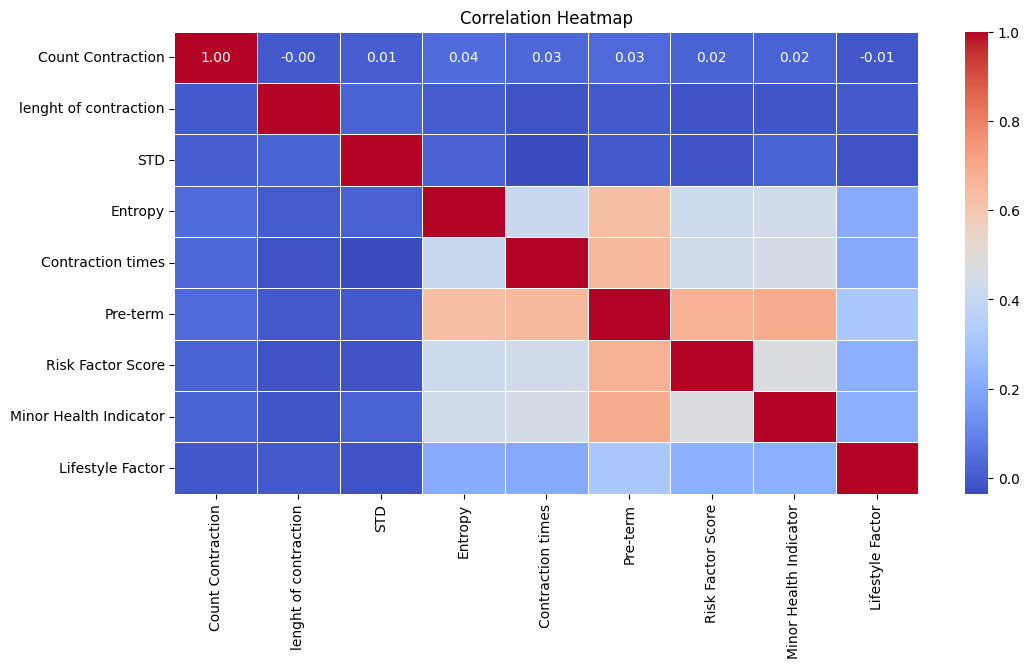

In [29]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

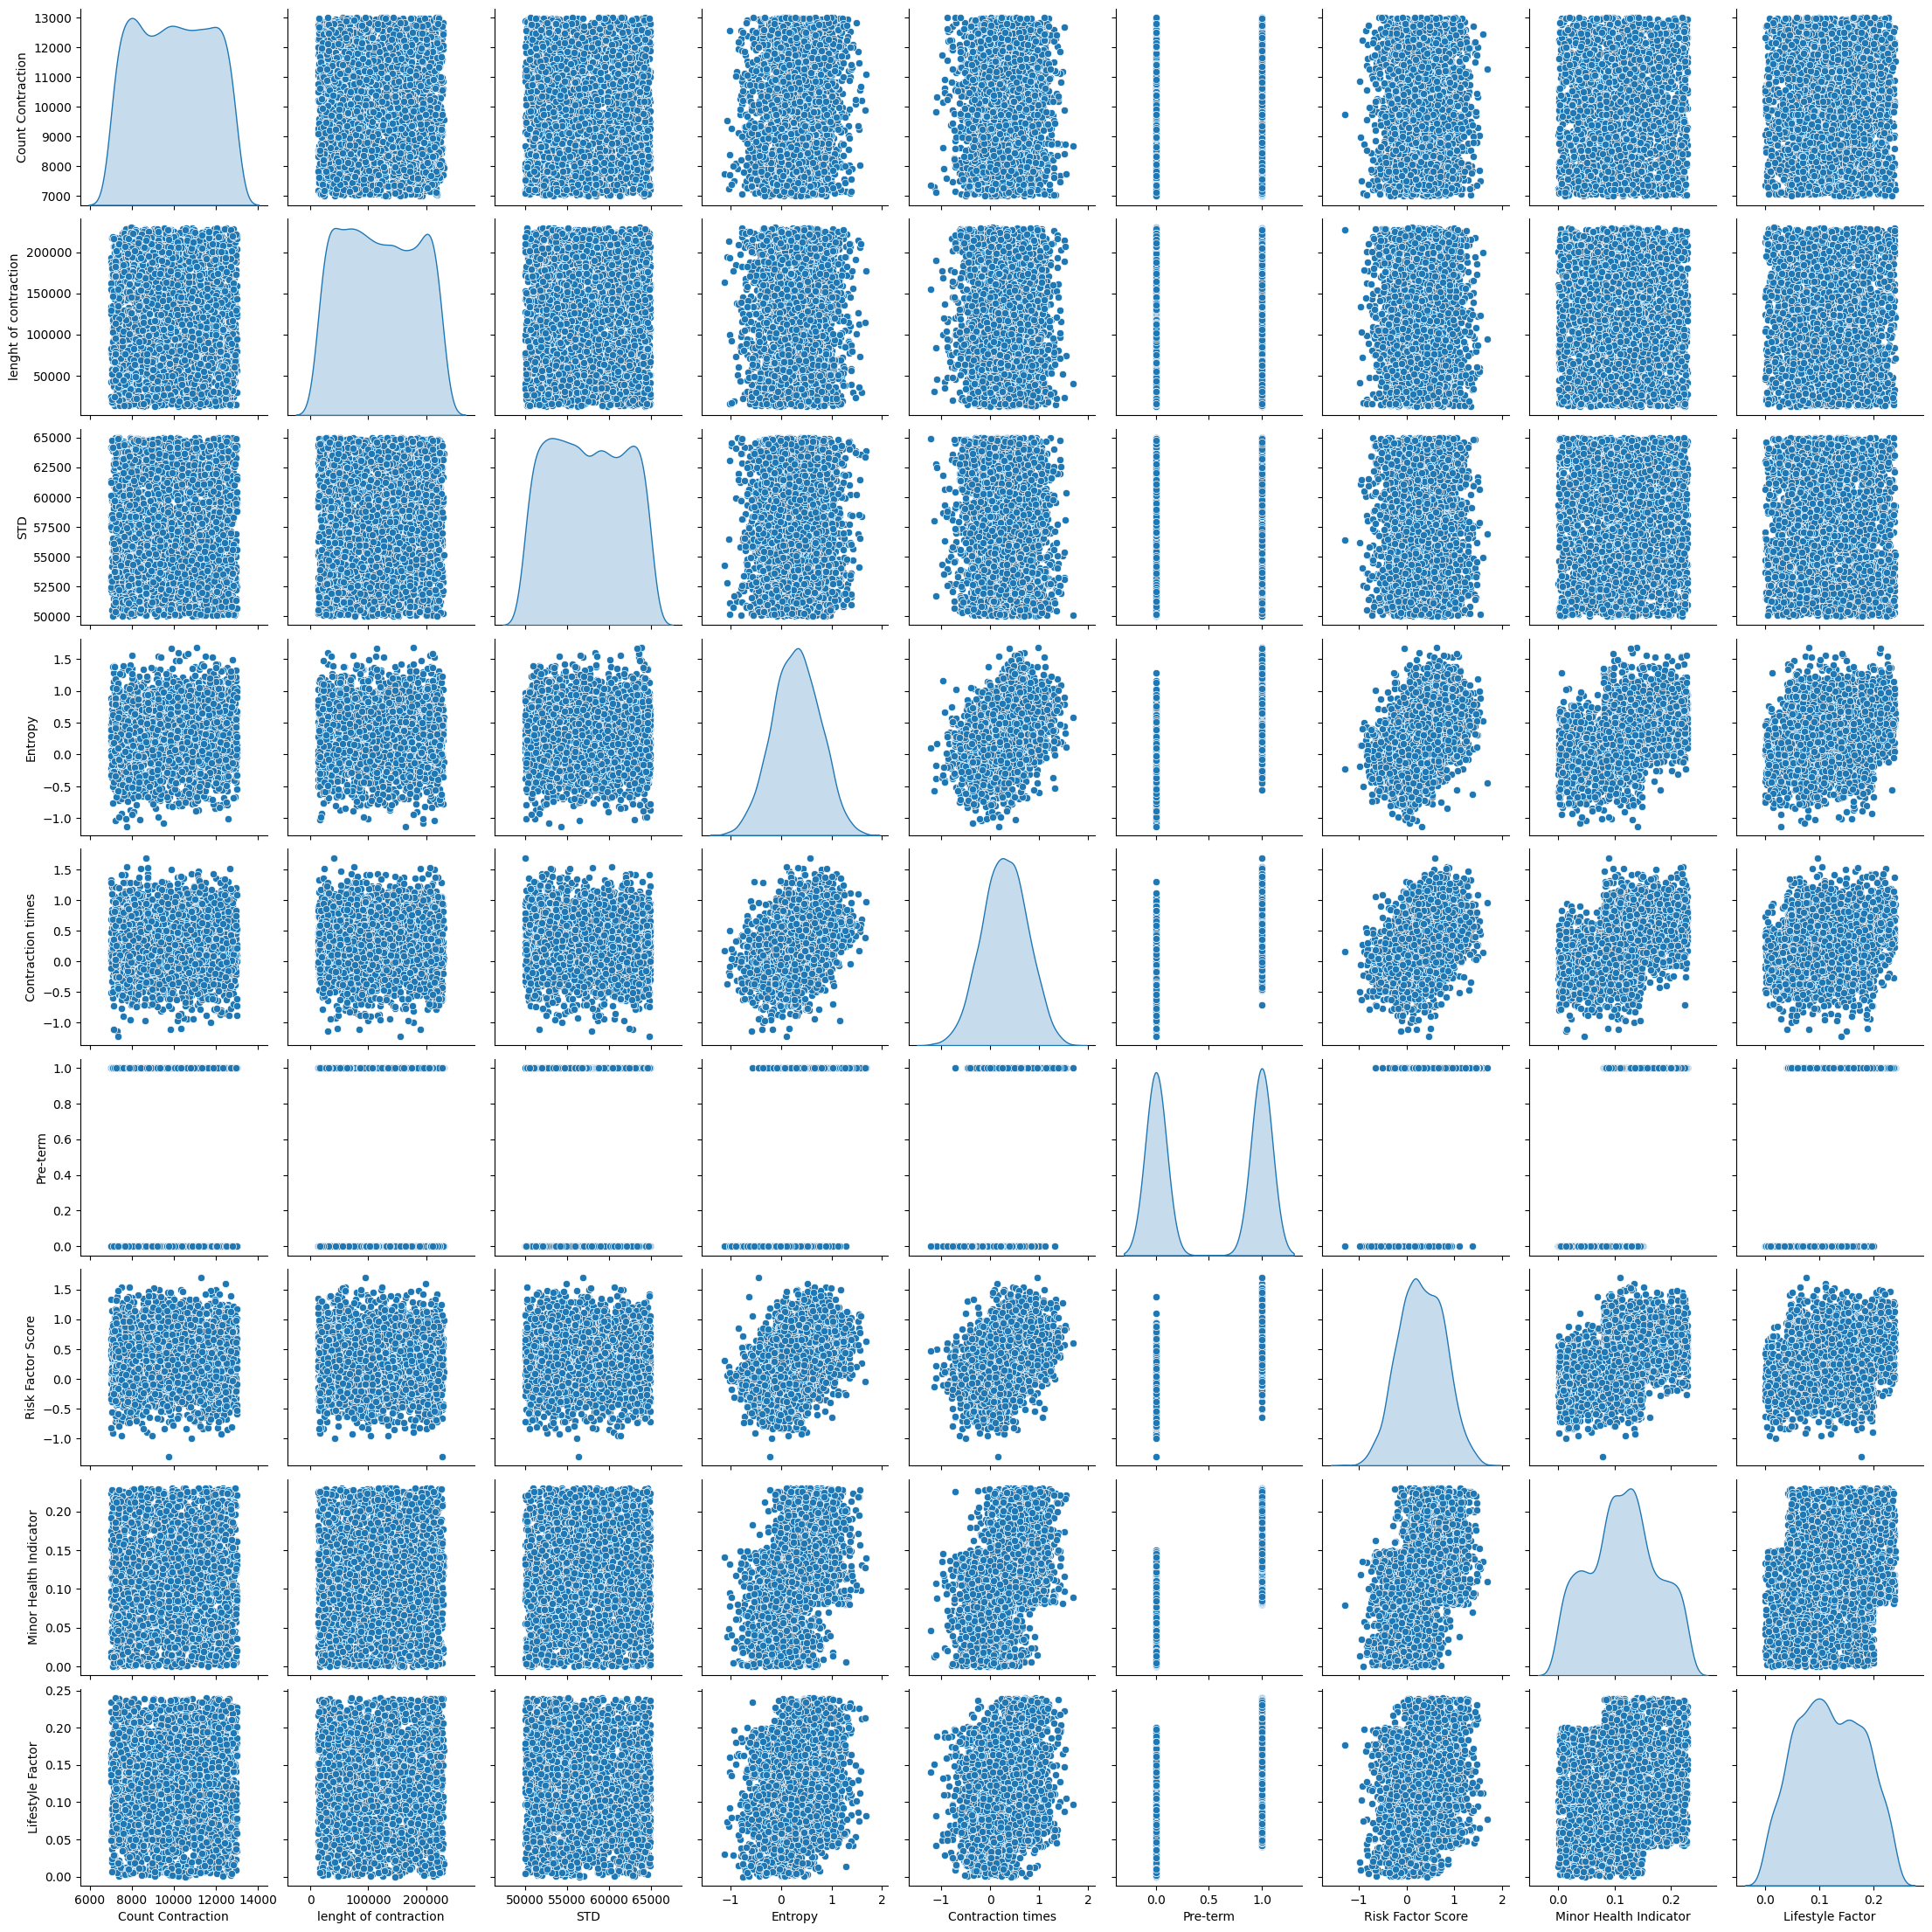

In [30]:
sns.pairplot(df ,diag_kind="kde")
plt.show()

In [31]:
threshold = 0.2
high_corr_features = correlation_matrix[abs(correlation_matrix) > threshold]
print("Highly correlated features:\n", high_corr_features)


Highly correlated features:
                         Count Contraction  lenght of contraction  STD  \
Count Contraction                     1.0                    NaN  NaN   
lenght of contraction                 NaN                    1.0  NaN   
STD                                   NaN                    NaN  1.0   
Entropy                               NaN                    NaN  NaN   
Contraction times                     NaN                    NaN  NaN   
Pre-term                              NaN                    NaN  NaN   
Risk Factor Score                     NaN                    NaN  NaN   
Minor Health Indicator                NaN                    NaN  NaN   
Lifestyle Factor                      NaN                    NaN  NaN   

                         Entropy  Contraction times  Pre-term  \
Count Contraction            NaN                NaN       NaN   
lenght of contraction        NaN                NaN       NaN   
STD                          NaN             

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


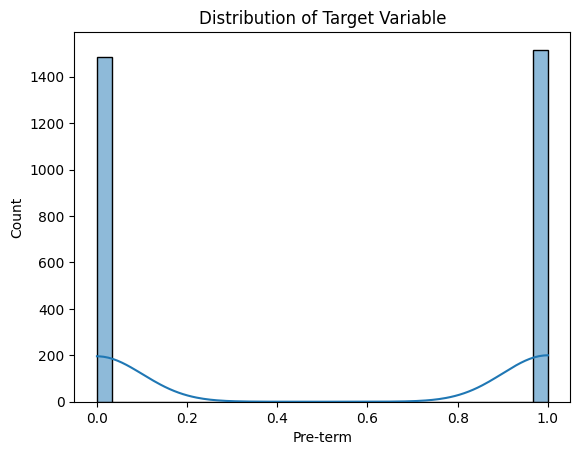

In [32]:
sns.histplot(df['Pre-term'], kde=True, bins=30)
plt.title("Distribution of Target Variable")
plt.show()


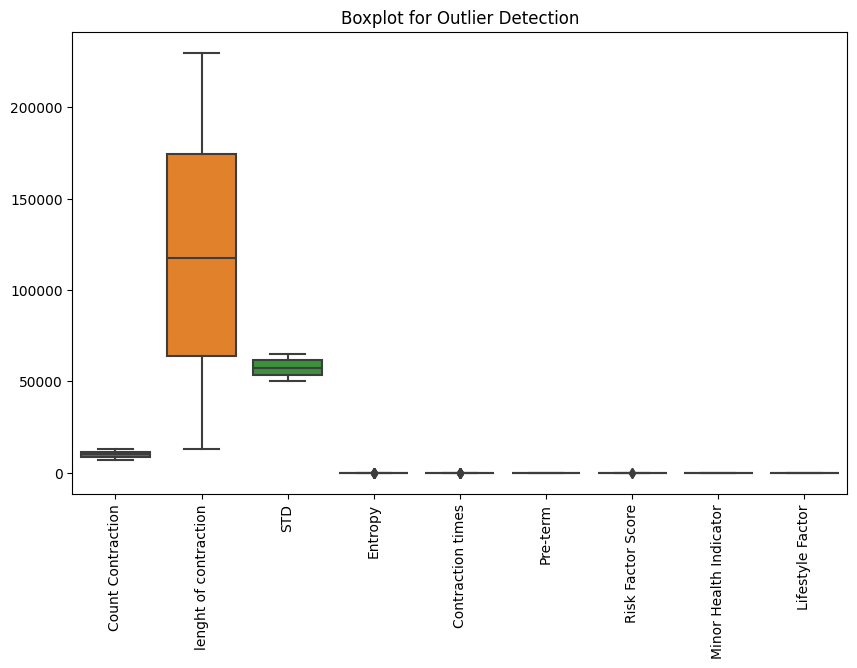

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


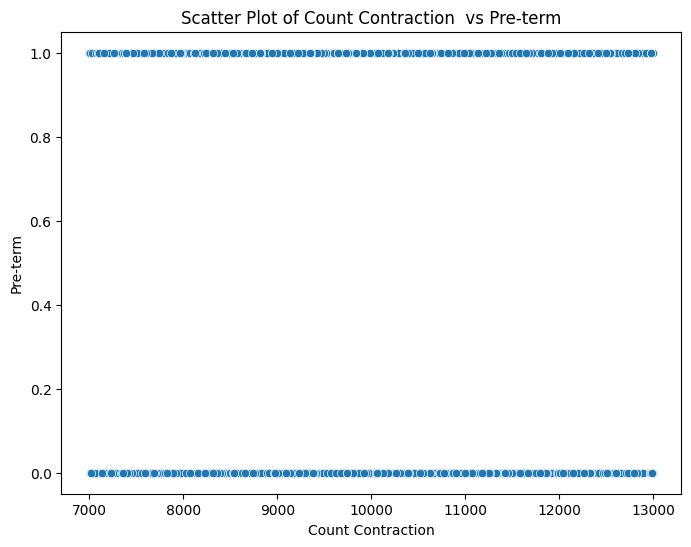

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'column_1' and 'column_2' with actual feature names
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Count Contraction'], y=df['Pre-term'])
plt.xlabel("Count Contraction")
plt.ylabel("Pre-term")
plt.title("Scatter Plot of Count Contraction  vs Pre-term")
plt.show()


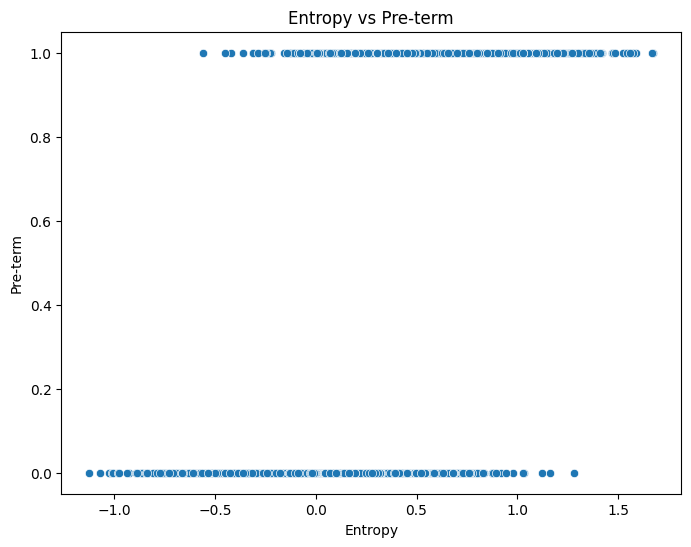

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'column_1' and 'column_2' with actual feature names
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Entropy'], y=df['Pre-term'])
plt.xlabel("Entropy")
plt.ylabel("Pre-term")
plt.title("Entropy vs Pre-term")
plt.show()


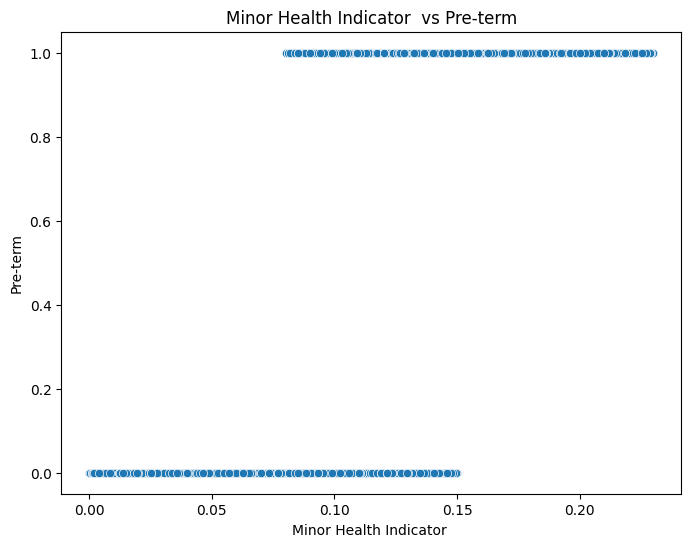

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'column_1' and 'column_2' with actual feature names
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Minor Health Indicator'], y=df['Pre-term'])
plt.xlabel("Minor Health Indicator ")
plt.ylabel("Pre-term")
plt.title("Minor Health Indicator  vs Pre-term")
plt.show()


## Key Takeaways:-
    

    • No null values detected, dataset is clean.
    • Target variable (Preterm) is balanced; both classes are well-represented.
    • Outliers present in Length of Contraction and Risk Factor Score. Consider handling them.
    • No severe multicollinearity detected. Correlation observed among some features(Entropy,minor health indicator,count contraction,risk factor.
    • Features have varying scales. Scaling required for certain algorithms.